In [ ]:
#Wrap code blocks in pdf
from IPython.display import HTML

HTML("""
<style>

    .input_area pre {
        white-space: pre-wrap !important;
    }
    .output_area pre {
        white-space: pre-wrap !important;
    }
    .text_cell_render pre {
        white-space: pre-wrap !important;
    }
</style>
""")

#**Group 4 Data Science Project**
Submitted by:

|Name | Mat Number/Reg. Number|
|--------|----------|
|ADEDOKUN Abiodun Abigail| 240000027|
|AGHOMI Favour| 240000549|
|OGBU Henry| 19PCH02041|
|OLUWADARE Bolaji| 240000300|
|UWIDIA Osalodion Emmanuel| 240000111|

> ## Topic: **Prediction of `airfare` prices**

This project explored predictive models for predicting airfare prices along new routes. We evaluated the impact of reducing the number of predictive features using stepwise regression and exhaustive search and compared the impact of both methods on the performance of the model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uwidia/Group-4-DS-Project/refs/heads/main/Airfare.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    int64  
 10  E_INCOME  638 non-null    int64  
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(3), int64(7), object(8)
memory usage: 89.8+ KB


# **Exploring The Relationship Between Feature and Target (FARE) Variables**

Before creating our model we explored the relationships between numerical and categorical features and our target variable. This step helped to highlight important patterns and relationships between predictors that could factor into the model building process

## (a) Numerical Predictors and FARE (target)



To explore the relationships between our numerical predictors and airfares, we used a correlation table, heatmap, and scatterplots. These tables and visualizations helped to identify single variables that have a strong linear relationship with FARE.

# **Correlation Table**

In [ ]:
print("CORRELATION TABLE: \n")
numerical_predictors = df.select_dtypes(include = ["int64","float64"])
numerical_predictors.corr()

CORRELATION TABLE: 



,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


# **Visualize Correlation Table with Heatmap of Predictor Variables and Airfare**

Heatmap to Visualize Relationship between FARE and numerical predictors


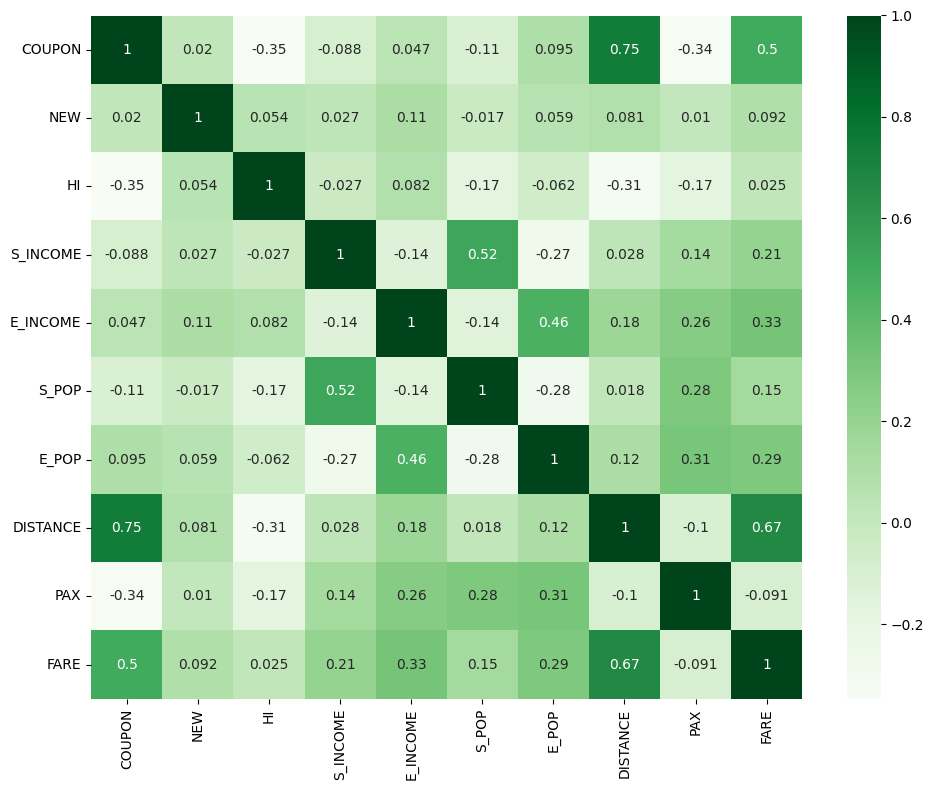

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_predictors.corr(), annot = True, cmap ="Greens")
plt.tight_layout()

print("Heatmap to Visualize Relationship between FARE and numerical predictors")

# **Scatter Plot of FARE vs Numerical Predictors**

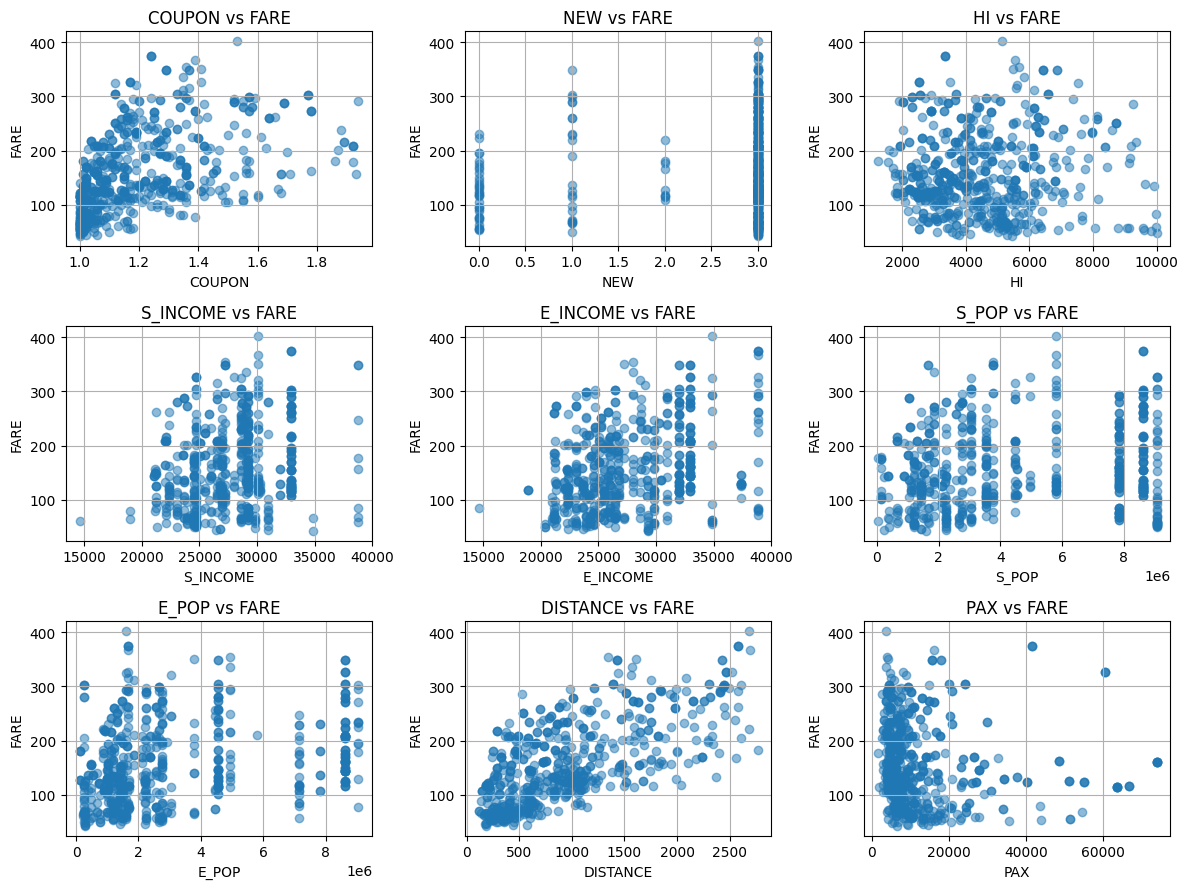

In [ ]:
features = list(numerical_predictors.drop("FARE", axis = 1).columns)
target = 'FARE'

n_rows = 3
n_cols = 3
none = 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 9))
axes = axes.flatten()

# Scatter Plots between FARE and other Numeric Predictors
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.5)
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

> Based on the results of our exploratory data analysis, DISTANCE (R = 0.67) was the best single predictor of airfare prices, followed by COUPON (R = 0.51).



# (b) Categorical Predictors and FARE (target)

In addition to exploring the relationship between numerical predictors and airfare prices, we examined the categorical predictors (except the first four (S_CODE, S_CITY, E_CODE, and E_CITY), which were deemed not necessary for the analysis).

Our exploration of the categorical data included:
- Computing the percentage of flights in each category
- Creating a pivot table with the average fare in each category

In [ ]:
categorical_predictors = df.select_dtypes(include = ["object"])
categorical_predictors = categorical_predictors.drop(["S_CODE","S_CITY", "E_CODE", "E_CITY"], axis = 1)

## **Percentage of Flights (Per Category)**

In [ ]:
percentage_dict = {col: df[col].value_counts(normalize=True) * 100 for col in categorical_predictors}
for col, percentages in percentage_dict.items():
    print(f"\nPercentage of flights in category {col}:\n{percentages}")


Percentage of flights in category VACATION:
VACATION
No     73.354232
Yes    26.645768
Name: proportion, dtype: float64

Percentage of flights in category SW:
SW
No     69.592476
Yes    30.407524
Name: proportion, dtype: float64

Percentage of flights in category SLOT:
SLOT
Free          71.473354
Controlled    28.526646
Name: proportion, dtype: float64

Percentage of flights in category GATE:
GATE
Free           80.564263
Constrained    19.435737
Name: proportion, dtype: float64


## **Average FARE in each category**

In [ ]:
col_names = list(categorical_predictors.columns)

pivot_tables = {col: df.pivot_table(values='FARE', index=col, aggfunc='mean') for col in col_names}
pivot_df = pd.concat(pivot_tables, axis=1)
# pivot_df = pivot_df.fillna(0)
print("\nComparison of differences in means for airfare across categories")
print("-" * 80)
print(pivot_df)


fare_differences = pivot_df.agg(['max', 'min'])
fare_differences = fare_differences.loc['max'] - fare_differences.loc['min']

print("\nComparison of differences in mean fare_differences across categories")
print("-" * 80)
print(fare_differences)


Comparison of differences in means for airfare across categories
--------------------------------------------------------------------------------
               VACATION          SW        SLOT        GATE
                   FARE        FARE        FARE        FARE
No           173.552500  188.182793         NaN         NaN
Yes          125.980882   98.382268         NaN         NaN
Controlled          NaN         NaN  186.059396         NaN
Free                NaN         NaN  150.825680  153.095953
Constrained         NaN         NaN         NaN  193.129032

Comparison of differences in mean fare_differences across categories
--------------------------------------------------------------------------------
VACATION  FARE    47.571618
SW        FARE    89.800525
SLOT      FARE    35.233716
GATE      FARE    40.033079
dtype: float64


Based on the difference in average airfares across categories. SW (Southwest Airlines) appears to be the most significant categorical predictor of fare. Routes with SW have a an average airfare difference of \$89.

>VACATION and GATE also showed notable differences in average fare, with values of \$47.5 and \$40.03, respectively

# **(C) Finding Model for Predicting FARE on New Route**

After performing basic exploratory data analysis on our predictors and features, we began the process of building our model for predicting airfare route by following these steps:
- Converting categorical variables to dummy variables
- Partitioning the data into training and validation sets
- Using ***stepwise regression*** and ***exhaustive search*** to reduce the number of predictors


(i) Converting Categorical predictors to dummy variables

In [ ]:
categorical_predictors = pd.get_dummies(categorical_predictors, drop_first = True)
categorical_predictors = categorical_predictors.astype(int) #convert dummy variables from boolean to int

numerical_predictors = numerical_predictors.drop(["FARE"], axis = 1)

#Standardize All Numeric predictors
scaler = StandardScaler()
scaled_num_predictors = scaler.fit_transform(numerical_predictors)
scaled_num_predictors = pd.DataFrame(scaled_num_predictors, columns=numerical_predictors.columns) #convert scaled predictor variables into a dataframe

#Merge both numerical and categorical columns afer converting to dummy variables and standardizing
all_predictor_variables = pd.concat([scaled_num_predictors, categorical_predictors], axis = 1)

(ii) Partitioning Data into Training and Validation Sets

In [ ]:
y = df["FARE"]
X =all_predictor_variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Stepwise Regression to Reduce the Number of Predictors**

In [ ]:
def stepwise_regression(X, y, significance_level_add=0.05, significance_level_remove=0.05, max_features=none, alpha=1.0):
    selected_features = []
    feature_importance = []

    while True:
        # Forward Step
        remaining_features = list(set(X.columns) - set(selected_features))
        new_coef = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            model1 = LinearRegression()
            model1.fit(X_train[selected_features + [new_column]], y_train)
            new_coef[new_column] = np.abs(model1.coef_[-1])

        max_coef = new_coef.max()
        if max_coef > 0:  # Include features if coefficient is not 0
            best_feature = new_coef.idxmax()
            selected_features.append(best_feature)
            feature_importance.append((best_feature, max_coef))
        else:
            break

        # Stop if max_features is reached
        if max_features and len(selected_features) >= max_features:
            break

        # Backward Step
        while True:
            model1 = LinearRegression()
            model1.fit(X_train[selected_features], y_train)
            coef_values = pd.Series(model1.coef_, index=selected_features)

            #Remove the feature with the smallest absolute coefficient
            min_coef = coef_values.abs().min()
            if min_coef < significance_level_remove:
                excluded_feature = coef_values.abs().idxmin()
                selected_features.remove(excluded_feature)

                feature_importance = [f for f in feature_importance if f[0] != excluded_feature]
            else:
                break

    # Sort features by importance (descending coefficient magnitude)
    feature_importance.sort(key=lambda x: -x[1])
    ordered_features = [f[0] for f in feature_importance]

    return ordered_features

stepwise_r_features = stepwise_regression(X_train, y_train)

# **Exhaustive Search to Reduce Number of Predictors**

In [ ]:
model2 = LinearRegression()

efs = EFS(
    model2,
    min_features=1,
    max_features=len(X.columns),
    scoring='neg_mean_squared_error',
    print_progress=True,
    cv=5
)

efs = efs.fit(X_train, y_train)

Features: 8191/8191

## Comparison Between Stepwise Regression and Exhaustive Search

After reducing the number of predictors using stepwise regression and exhaustive search, we compared both models in terms of:
- Predictors in each model
- RMSE and average error (MAE)
- Using a lift chart

### Predictors in each model

In [ ]:
print("Selected features from Stepwise Regression (Ordered by importance):\n", f"Number of features; {len(stepwise_r_features)}\n",  f"Selected Features: {stepwise_r_features}")

print("-"*140)

print('\nSelected features from Exhaustive Search:\n', f"Number of features; {len(efs.best_feature_names_)}\n",  f"Selected Features: {efs.best_feature_names_}")


Selected features from Stepwise Regression (Ordered by importance):
 Number of features; 10
 Selected Features: ['SW_Yes', 'VACATION_Yes', 'DISTANCE', 'GATE_Free', 'SLOT_Free', 'HI', 'S_POP', 'E_POP', 'E_INCOME', 'PAX']
--------------------------------------------------------------------------------------------------------------------------------------------

Selected features from Exhaustive Search:
 Number of features; 11
 Selected Features: ('HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free')


### RMSE and average error (MAE) of both models

In [ ]:
#Make Predictions with Predictors Chosen By Stepwise Regression
X_train_stepwise = X_train[stepwise_r_features]
X_test_stepwise = X_test[stepwise_r_features]

model_stepwise = LinearRegression()
model_stepwise.fit(X_train_stepwise, y_train)

y_pred_stepwise = model_stepwise.predict(X_test_stepwise)

# Evaluate Performance
mse_stepwise= mean_squared_error(y_test, y_pred_stepwise)
rmse_stepwise = np.sqrt(mse_stepwise)
mae_stepwise = mean_absolute_error(y_test, y_pred_stepwise)


print(f"Evaluation of Model with Fewer Features Selected Using Stepwise Regression")
print("-"*140)
print(f"Root Mean Squared Error (RMSE): {rmse_stepwise:.2f}")
print(f"Mean Absolute Error: {mae_stepwise:.2f}")

#Make Predictions with Predictors Chosen By Exhaustive Search
exhaustive_s_features = list(efs.best_feature_names_)
X_train_exhaustive = X_train[exhaustive_s_features]
X_test_exhaustive = X_test[exhaustive_s_features]

model_exhaustive = LinearRegression()
model_exhaustive.fit(X_train_exhaustive, y_train)
y_pred_exhaustive = model_exhaustive.predict(X_test_exhaustive)

mse_exhaustive = mean_squared_error(y_test, y_pred_exhaustive)
mse_exhaustive = mean_squared_error(y_test, y_pred_exhaustive)
rmse_exhaustive = np.sqrt(mse_exhaustive)
mae_exhaustive = mean_absolute_error(y_test, y_pred_exhaustive)

print(f"\nEvaluation of Model with Fewer Features Selected Using Exhaustive Search")
print("-"*140)
print(f"Root Mean Squared Error (RMSE): {rmse_exhaustive:.2f}")
print(f"Mean Absolute Error: {mae_exhaustive:.2f}")

Evaluation of Model with Fewer Features Selected Using Stepwise Regression
--------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 33.88
Mean Absolute Error: 24.99

Evaluation of Model with Fewer Features Selected Using Exhaustive Search
--------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 33.52
Mean Absolute Error: 24.60


> *The Exhaustive search perfomed slightly better than stepwise regression, with an **RMSE value of 33.52 and MAE of 24.60**, compared to 33.88 and 24.99 gotten with stepwise regression*

### Lift Chart

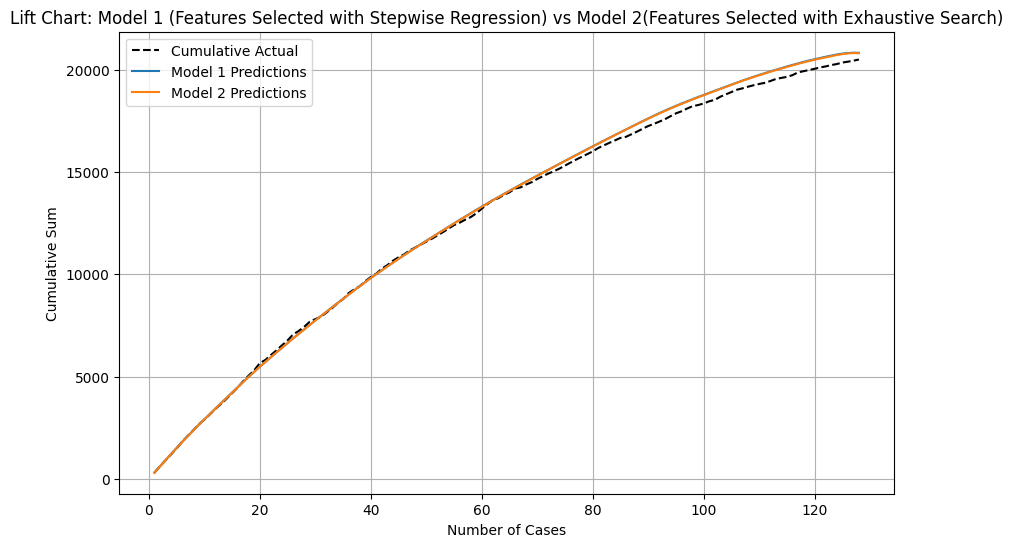

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Model1_Pred': y_pred_stepwise,
    'Model2_Pred': y_pred_exhaustive
})

# Sort first model predictions (descending order)
results_sorted_model1 = results.sort_values(by='Model1_Pred', ascending=False)

results_sorted_model1['Cumulative_Actual'] = results_sorted_model1['Actual'].cumsum()
results_sorted_model1['Cumulative_Model1'] = results_sorted_model1['Model1_Pred'].cumsum()

# Sort second model predictions (descending order)
results_sorted_model2 = results.sort_values(by='Model2_Pred', ascending=False)

results_sorted_model2['Cumulative_Actual'] = results_sorted_model2['Actual'].cumsum()
results_sorted_model2['Cumulative_Model2'] = results_sorted_model2['Model2_Pred'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results) + 1), results_sorted_model1['Cumulative_Actual'], label='Cumulative Actual', color='black', linestyle='--')
plt.plot(np.arange(1, len(results) + 1), results_sorted_model1['Cumulative_Model1'], label='Model 1 Predictions')
plt.plot(np.arange(1, len(results) + 1), results_sorted_model2['Cumulative_Model2'], label='Model 2 Predictions')

plt.xlabel('Number of Cases')
plt.ylabel('Cumulative Sum')
plt.title('Lift Chart: Model 1 (Features Selected with Stepwise Regression) vs Model 2(Features Selected with Exhaustive Search)')
plt.legend()
plt.grid()
plt.show()

# (v) **Predicting the average fair on new routes**

After building our model, we used it to predict new routes. One of the routes had the following characteristics:

* COUPON = 1.202
* NEW = 3
* VACATION = No
* SW = No
* HI = 4442.41
* S_INCOME = 28,760
* E_INCOME = 27,664
* S_POP = 4,557,404
* E_POP = 3195503
* SLOT = Free
* GATE = Free
* PAX = 12782
* DISTANCE = 1976



In [ ]:
new_route = {"COUPON": 1.202, "NEW": 3, "HI":4442.141, "S_INCOME":28760, "E_INCOME":27664, "S_POP":4557004, "E_POP":3195503, "DISTANCE":1976, "PAX":12782, "VACATION_Yes": 0, "SW_Yes": 0, "SLOT_Free": 1, "GATE_Free": 1}


def predict_fare(route, selected_model, model_features):
  new_route = pd.DataFrame([route])
  #select the first 9 columns (numerical columns) of the dataframe, scale them, and merge with categorical columns
  scaled_new_route = scaler.transform(new_route.iloc[:, :9])
  scaled_new_route = pd.DataFrame(scaled_new_route, columns=new_route.columns[:9])
  new_route = pd.concat([scaled_new_route, new_route.iloc[:, 9:]], axis=1)

  y_pred = selected_model.predict(new_route[model_features])
  return y_pred[0]

In [ ]:
fare_price = predict_fare(new_route, model_exhaustive, exhaustive_s_features)
print(f"The airfare price for this route is ${fare_price:.2f}")

The airfare price for this route is $249.83


## **(vi) Prediction of Airfare if Southwest decides to cover the above route (using model 2 [Built with Exhaustive Search])**

The predicted airfare for the above route is $249.83. However, we compared the difference in air ticket prices for the same route assuming southwest decides to cover that route.

In [ ]:
sw_yes = {"COUPON": 1.202, "NEW": 3, "HI":4442.141, "S_INCOME":28760, "E_INCOME":27664, "S_POP":4557004, "E_POP":3195503, "DISTANCE":1976, "PAX":12782, "VACATION_Yes": 0, "SW_Yes": 1, "SLOT_Free": 1, "GATE_Free": 1}

sw_yes_fare = predict_fare(sw_yes, model_exhaustive, exhaustive_s_features)
print(f"The airfare price for this route is ${sw_yes_fare:.2f}. The difference in price is {fare_price - sw_yes_fare:.2f}")

The airfare price for this route is $209.30. The difference in price is 40.53


If southwest decides to cover this route, our model predicted a reduction in air ticket prices from \$249.03 to \$208.91

## **(Vii) Estimation of Unavailable Predictor Variables**
In reality, some predictor variables used for the initial model building may not be available for predicting airfare from a new airport (.i.e until the airport begins traveling on a new route), such as:
- PAX (Number of passengers on that route during the time of data collection)
- SLOT (measure of congestion)
- GATE (measure of congestion)

Furthermore, while some factors may not be readily available to a new airport, they can be estimated or sourced from publicly available datasets.
- DISTANCE (can be accurately estimated using geographical data).

- COUPON (can be estimated based on historical data from similar routes).

- HI (can be estimated by analyzing the airport's status as a hub or non-hub).

- S_INCOME, E_INCOME, S_POP, E_POP: Socioeconomic data can be estimated using external government databases.

### Building Model with factors that are available before flights begin to operate on the new route

In [ ]:
model3 = LinearRegression()
available_factors = X.drop(["PAX","SLOT_Free", "GATE_Free"], axis = 1).columns
efs_new_airport = EFS(
    model3,
    min_features=1,
    max_features=len(X[available_factors].columns),
    scoring='neg_mean_squared_error',
    print_progress=True,
    cv=5
)

efs_new_airport = efs_new_airport.fit(X_train[available_factors], y_train)


Features: 1023/1023

In [ ]:
new_airport_features = list(efs_new_airport.best_feature_names_)
X_train_new_airport = X_train[new_airport_features]
X_test_new_airport = X_test[new_airport_features]

model_new_airport = LinearRegression()
model_new_airport.fit(X_train_new_airport, y_train)

LinearRegression()

## **(ix) Using the new airport model to predict a route**

In [ ]:
new_route = {"COUPON": 1.202, "NEW": 3, "HI":4442.141, "S_INCOME":28760, "E_INCOME":27664, "S_POP":4557004, "E_POP":3195503, "DISTANCE":1976, "PAX":12782, "VACATION_Yes": 0, "SW_Yes": 0, "SLOT_Free": 1, "GATE_Free": 1}

new_fare_price = predict_fare(new_route, model_new_airport, new_airport_features)
print(f"The airfare price for this route is ${new_fare_price:.2f}")

The airfare price for this route is $257.17


## (x) Comparing Predictive Accuracy of New Airport Model with Exhaustive Search Model With All Predictor Features Available

> Finally, we compared the performance of the model built with only features available to a new airport with a model built with all possible features present

In [ ]:
#Initial Model (All predictors available)
print(f"\nEvaluation of Initial Model with All Predictors Available")
print("-"*140)
print(f"Root Mean Squared Error (RMSE): {rmse_exhaustive:.2f}")
print(f"Mean Absolute Error: {mae_exhaustive:.2f}")

#Model for New Airport
y_pred_new_airport = model_new_airport.predict(X_test_new_airport)

mse_new_airport = mean_squared_error(y_test, y_pred_new_airport)
mse_new_airport = mean_squared_error(y_test, y_pred_new_airport)
rmse_new_airport = np.sqrt(mse_new_airport)
mae_new_airport = mean_absolute_error(y_test, y_pred_new_airport)

print(f"\nEvaluation of Model for New Airport (Unavailable Predictors Removed)")
print("-"*140)
print(f"Root Mean Squared Error (RMSE): {rmse_new_airport:.2f}")
print(f"Mean Absolute Error: {mae_new_airport:.2f}")


Evaluation of Initial Model with All Predictors Available
--------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 33.52
Mean Absolute Error: 24.60

Evaluation of Model for New Airport (Unavailable Predictors Removed)
--------------------------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 34.89
Mean Absolute Error: 26.10


If the goal were to evaluate the effect of Southwest Airlines’ (SW) presence on the airline industry rather than predicting fares, the analysis would differ in several aspects.

1. **Causal Analysis Instead of Prediction**:  
   - The focus would shift from predicting fare levels to understanding the causal impact of Southwest Airlines on market fares and industry competition.  
   - Causal inference methods would be prioritized to isolate Southwest’s effect from other factors.

2. **Comparative Study**:  
   - Instead of using a single dataset for predictive modeling, a **difference-in-differences** (DiD) analysis could be conducted. This would compare routes where Southwest entered versus similar routes without Southwest.

3. **Market Behavior Analysis**:  
   - Factors like changes in route frequency, airline market share, and passenger demand would be analyzed to assess how competitors respond to Southwest’s entry.

Instead of focusing on predictive accuracy, this analysis would provide actionable insights into Southwest Airlines' market impact. Results could guide airline regulators, policymakers, and competitors in making informed decisions about market competition and pricing strategies.